In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 4]
plt.style.use("fivethirtyeight")

pd.options.display.max_rows=1000

import warnings
warnings.simplefilter('ignore')

In [3]:
def get_data():
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
    sub = pd.read_excel("sample_submission.xlsx")

    print(train.shape, test.shape)
    
    return train, test

In [4]:
train, test = get_data()

data = pd.concat([train, test], axis=0)
data['source'] = np.nan
data['source'].iloc[:train.shape[0]] = "train"
data['source'].iloc[train.shape[0]: ] = "test"
data.drop(['class'], axis=1, inplace=True)

print(data.shape)

(1358, 16) (583, 15)
(1941, 16)


In [5]:
data.head()

,grade_A_Component_1,grade_A_Component_2,log_area,max_luminosity,pixel_area,thickness,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,xmax,xmin,ymax,ymin,source
0,0,1,439.099273,150,439,36,0,0,1,0,0,172,144,947332,947225,train
1,1,0,329.205616,134,329,55,1,0,0,0,0,1152,1144,2379624,2379058,train
2,1,0,300.120598,135,300,65,0,0,0,0,0,974,950,1036754,1038442,train
3,0,1,6803.778622,123,6803,35,0,0,1,0,0,220,41,1705604,1705580,train
4,1,0,251.401943,138,251,69,0,0,0,0,0,466,462,1086579,1088124,train


In [5]:
train.nunique()

grade_A_Component_1       2
grade_A_Component_2       2
max_luminosity          131
thickness               143
xmin                    775
xmax                    811
ymin                   1358
ymax                   1358
pixel_area              813
log_area               1358
x_component_1             2
x_component_2             2
x_component_3             2
x_component_4             2
x_component_5             2
class                     2
dtype: int64

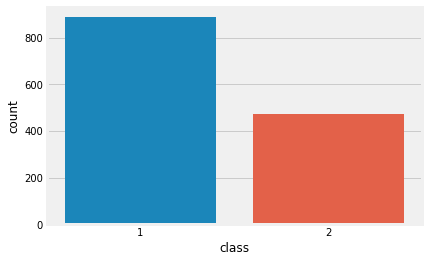

In [6]:
col = 'class'

sns.countplot(train[col])

### grade_A_Component_1

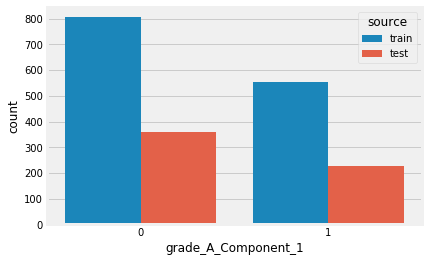

In [7]:
col = 'grade_A_Component_1'
sns.countplot(data[col], hue=data['source'])

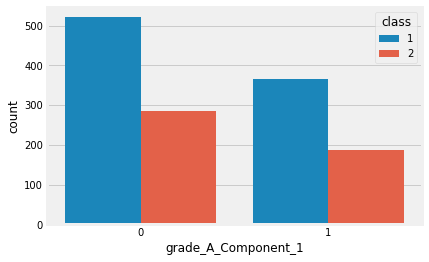

In [8]:
sns.countplot(train[col], hue=train['class'])

### grade_A_Component_2 

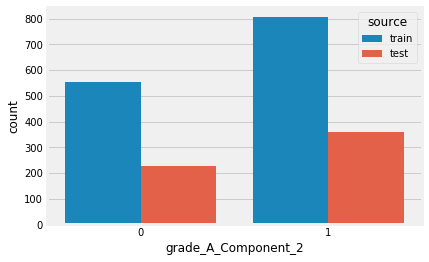

In [9]:
col = 'grade_A_Component_2'
sns.countplot(data[col], hue=data['source'])

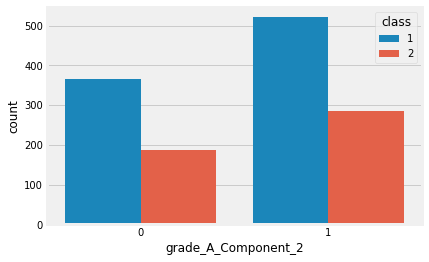

In [10]:
sns.countplot(train[col], hue=train['class'])

### max_luminosity

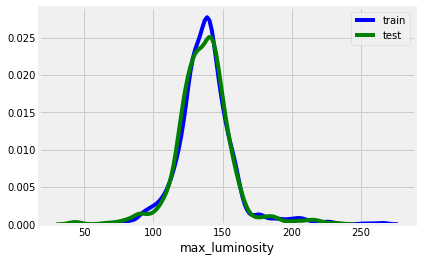

In [46]:
col = 'max_luminosity'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

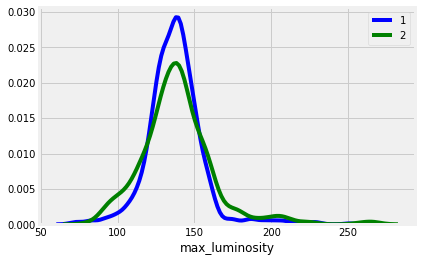

In [47]:
target = 'class'
plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

### thickness               

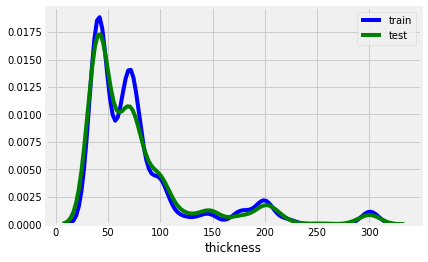

In [15]:
col = 'thickness'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

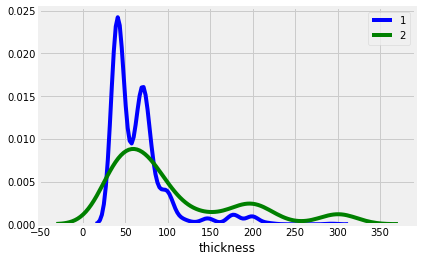

In [21]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

we can observe that for thickness > 200 , glass quality is always 2

### xmin

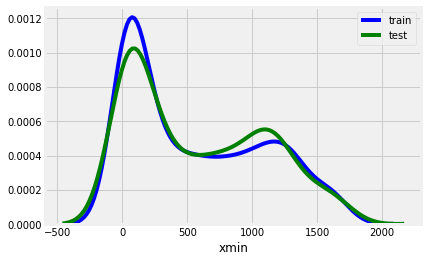

In [22]:
col = 'xmin'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

Xmin column looks somwhat normal

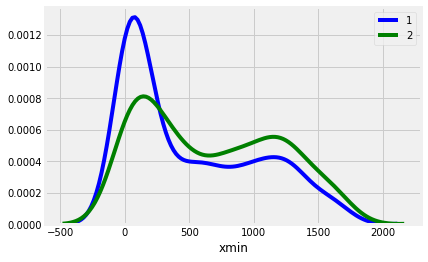

In [23]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

#### Xmax

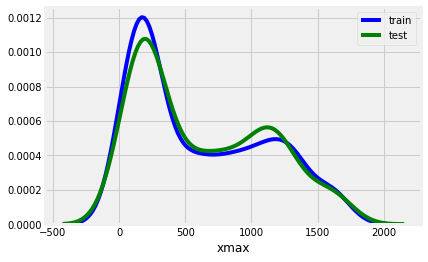

In [26]:
col = 'xmax'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

Xmax column looks somwhat normal

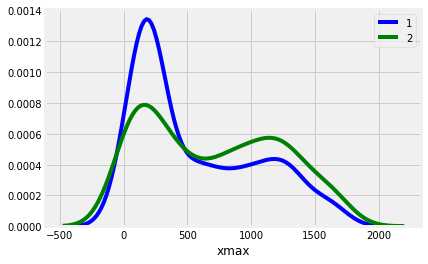

In [27]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

### ymin

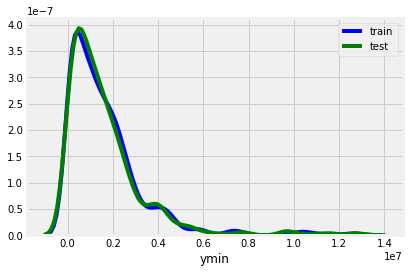

In [28]:
col = 'ymin'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

Ymax column is right Skewed  - might need transformation while modelling

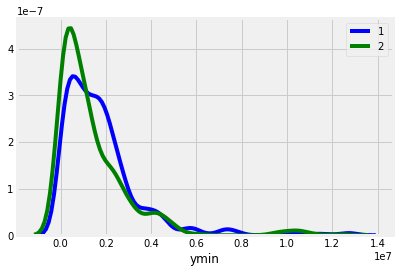

In [29]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

#### ymax

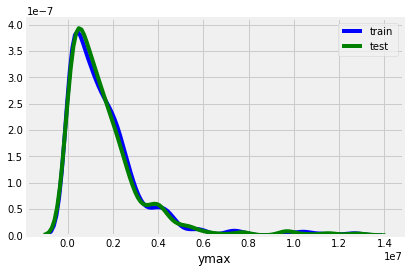

In [35]:
col = 'ymax'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

Ymax column is right Skewed  - might need transformation while modelling

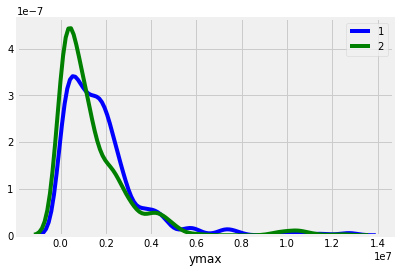

In [33]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

### pixel_area

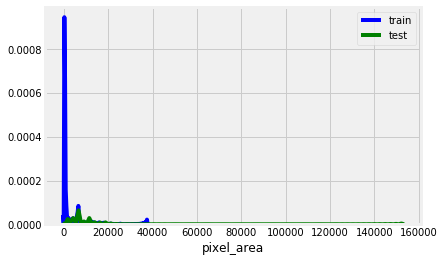

In [38]:
col = 'pixel_area'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

pixel_area is right skewed - need scaling or transformation 

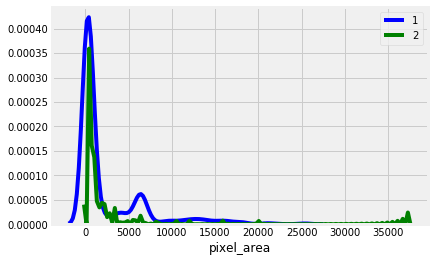

In [40]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

we can see more the pixel area (grater than 10000) , more the glass quality belongs to class 2

### log_area

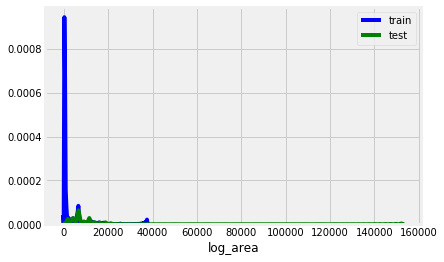

In [41]:
col = 'log_area'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

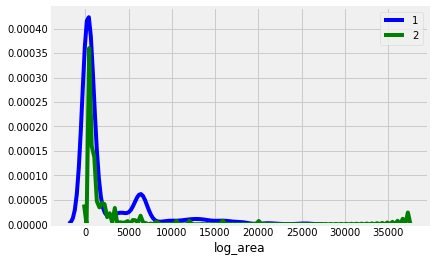

In [42]:
target = 'class'

plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1', hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
plt.legend(loc='best')
plt.show()

we can clearly see the distribution of log_area & pixel_area is similar , we can drop one of the features

In [ ]:
### max_luminosity

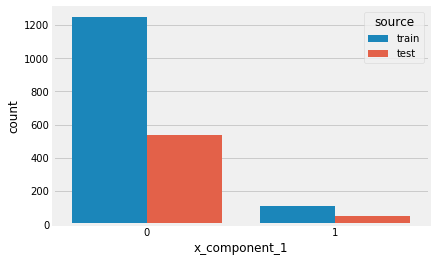

In [49]:
col = 'x_component_1'

sns.countplot(data[col], hue=data['source'])

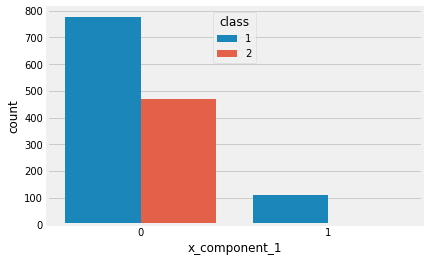

In [50]:
sns.countplot(train[col], hue=train['class'])

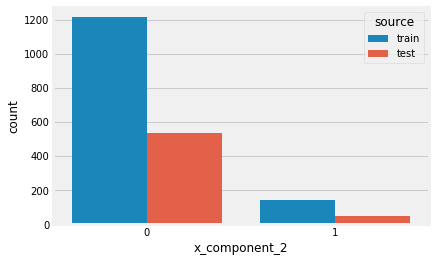

In [51]:
col = 'x_component_2'

sns.countplot(data[col], hue=data['source'])

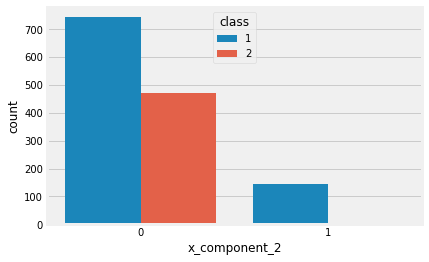

In [52]:
sns.countplot(train[col], hue=train['class'])

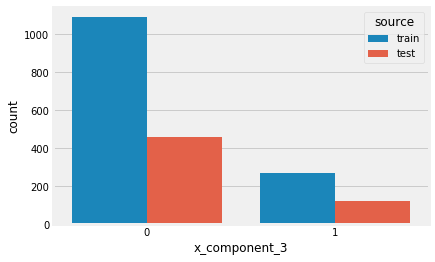

In [53]:
col = 'x_component_3'

sns.countplot(data[col], hue=data['source'])

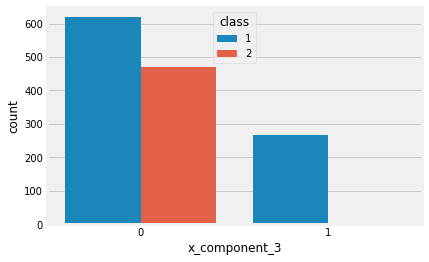

In [54]:
sns.countplot(train[col], hue=train['class'])

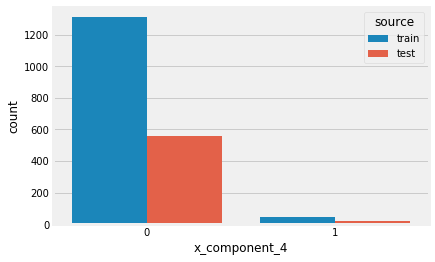

In [55]:
col = 'x_component_4'

sns.countplot(data[col], hue=data['source'])

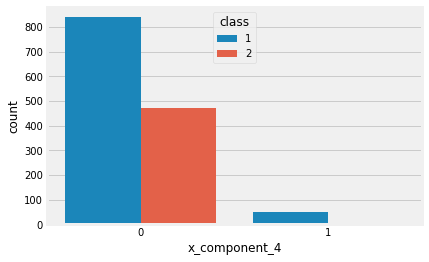

In [56]:
sns.countplot(train[col], hue=train['class'])

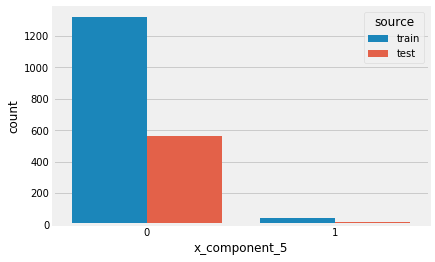

In [57]:
col = 'x_component_5'

sns.countplot(data[col], hue=data['source'])

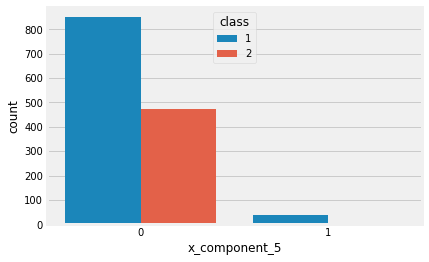

In [58]:
sns.countplot(train[col], hue=train['class'])

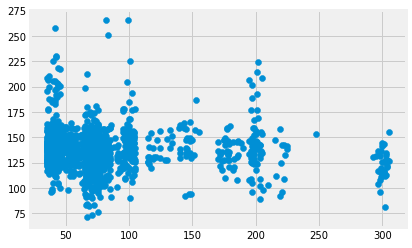

In [8]:
plt.scatter(train['thickness'],train['max_luminosity'])

### we can see that x_component_1 to x_component_5 columns having 1 value always represents to class 1 so we can separate our data based on that rule

In [75]:
print("Train Coverage : {:.2f}%".format(
                                        (train[
                                                (train['x_component_1'] == 1) | 
                                                (train['x_component_2'] == 1) | 
                                                (train['x_component_3'] == 1) | 
                                                (train['x_component_4'] == 1) | 
                                                (train['x_component_5'] == 1)
                                            ].shape[0] / train.shape[0]) * 100
                                       )
     )

Train Coverage : 44.85%


In [77]:
print("Test Coverage : {:.2f}%".format(
                                        (test[
                                                (test['x_component_1'] == 1) | 
                                                (test['x_component_2'] == 1) | 
                                                (test['x_component_3'] == 1) | 
                                                (test['x_component_4'] == 1) | 
                                                (test['x_component_5'] == 1)
                                            ].shape[0] / test.shape[0]) * 100
                                       )
     )

Test Coverage : 44.08%


In [62]:
def get_rules_ids(df):
    idx_df = df[
                (df['x_component_1'] == 1) |
                (df['x_component_2'] == 1) | 
                (df['x_component_3'] == 1) | 
                (df['x_component_4'] == 1) | 
                (df['x_component_5'] == 1)
                ].index
    
    return idx_df

idx_train = get_rules_ids(train)
idx_test = get_rules_ids(test)

train_orig = train.copy()
test_orig = test.copy()

train.drop(idx_train, axis=0, inplace=True)
test.drop(idx_test, axis=0, inplace=True)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

train.to_csv("train_1.csv", index=False)
test.to_csv("test_1.csv", index=False)

print("New Train Shape : {}\nNew Test Shape :  {}".format(train.shape, test.shape))

New Train Shape : (749, 17)
New Test Shape :  (326, 16)


In [64]:
import joblib

llist = test_orig.index.values.tolist()
for item in test['index'].values.tolist():
    llist.remove(item)

print(len(llist))
joblib.dump(llist, "already_1_indexes_test.pkl")

257


['already_1_indexes_test.pkl']